In [1]:
label_kr = {
    'c_1' :0, #'종이',
    'c_2_01': 1, #'종이팩',
    'c_2_02': 2, #'종이컵',
    'c_3': 3, #'캔류',
    'c_4_01_02': 4, #'재사용 유리(소주병 + 맥주병)',
    'c_4_02_01_02': 5, #'갈색 유리',
    'c_4_02_02_02': 6, #'녹색 유리',
    'c_4_02_03_02': 7, #'백색 유리',
    'c_4_03': 8, #'기타 유리',
    'c_5_02': 9, #'페트',
    'c_6': 10, #'플라스틱',
    'c_7': 11, #'비닐',
    ## 이 위에는 재활용
    ## 밑에는 일반쓰레기
    'c_1_01': 12, #'종이 + 이물질',
    'c_2_02_01': 13, #'종이컵 + 이물질',
    'c_3_01': 14, #'캔 + 이물질',
    'c_4_03_01': 15, #'기타 유리 + 이물질',
    'c_5_01_01': 16, #'페트 + 이물질 + 다중포장재',
    'c_5_02_01' : 17, #'페트+이물질',
    'c_6_01': 18, #'플라스틱 + 이물질',
    'c_7_01': 19, #'비닐 + 이물질',

    # 다중포장재
    'c_4_01_01': 20, #'재사용 유리(소주병+맥주병) + 다중 포장재',
    'c_4_02_01_01': 21, #'갈색 유리 + 다중포장재',
    'c_4_02_02_01': 22, #'녹색 유리 + 다중포장재',
    'c_4_02_03_01': 23, #'백색 유리 + 다중포장재',
    'c_5_01': 24, #'페트 + 다중포장재',
    'c_8_01': 25, #'흰색 스티로폼',
    'c_8_02': 26, #'컬러 스티로폼',
    'c_8_01_01': 27, #'스티로폼 + 이물질',
    'c_9': 28, #'건전지'
}

각 label의 train/val비율 계산

In [25]:
import os
import json

train_label_count = {
    'A' : [0 for _ in range(29)],
    'B' : [0 for _ in range(29)],
    'C' : [0 for _ in range(29)]
}

train_path = 'Train_label'
train_label_list = os.listdir(train_path)
print(f'train 데이터 개수 : {len(train_label_list)}')
count = 0

for file_name in train_label_list:
    clss = file_name[0]
    with open(os.path.join(train_path,file_name), 'r',encoding="UTF-8") as file:
            data = json.load(file)
            for dictionary in data["objects"]:
                train_label_count[clss][label_kr[dictionary['class_name']]] += 1
            count += 1
print(f'분석한 데이터 개수 : {count}')

train 데이터 개수 : 441241
분석한 데이터 개수 : 441241


In [24]:
valid_label_count = {
    'A' : [0 for _ in range(29)],
    'B' : [0 for _ in range(29)],
    'C' : [0 for _ in range(29)]
}

valid_path = 'Val_label'
valid_label_list = os.listdir(valid_path)
print(f'valid 데이터 개수 : {len(valid_label_list)}')
count = 0

for file_name in valid_label_list:
    clss = file_name[0]
    with open(os.path.join(valid_path,file_name), 'r',encoding="UTF-8") as file:
        data = json.load(file)
        for dictionary in data["objects"]:
            valid_label_count[clss][label_kr[dictionary['class_name']]] += 1
        count += 1
print(f'분석한 데이터 개수 : {count}')

valid 데이터 개수 : 55148
분석한 데이터 개수 : 55148


In [39]:
# A+B+C 의 train / valid 개수

train_total_label = [0 for _ in range(29)]
valid_total_label = [0 for _ in range(29)]

for k,v in train_label_count.items():
    for i in range(29):
        train_total_label[i] += v[i]

for k,v in valid_label_count.items():
    for i in range(29):
        valid_total_label[i] += v[i]

print(f'train의 label 총 개수 : {sum(train_total_label)}')
print(f'valid의 label 총 개수 : {sum(valid_total_label)}')

print(f'train label : {train_total_label}')
print(f'valid label : {valid_total_label}')

train의 label 총 개수 : 1287331
valid의 label 총 개수 : 139280
train label : [59523, 14822, 13010, 62213, 5976, 7003, 5394, 5670, 7783, 39750, 239054, 82832, 8960, 19160, 13651, 5442, 105894, 15612, 255406, 9961, 7334, 11360, 6980, 10412, 228168, 9402, 3826, 10113, 22620]
valid label : [2240, 762, 293, 3042, 266, 324, 1305, 1837, 494, 7720, 27740, 3589, 667, 1817, 613, 3147, 11292, 3888, 26623, 1685, 3361, 946, 56, 206, 28573, 338, 5730, 718, 8]


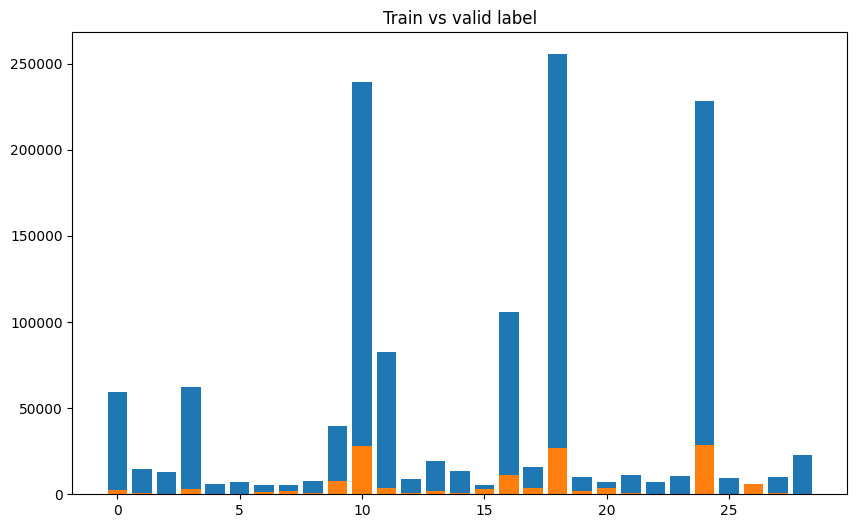

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar([i for i in range(29)],train_total_label)
plt.bar([i for i in range(29)],valid_total_label)
plt.title('Train vs valid label')
plt.show()

In [41]:
# A / B / C 각각의 train : valid 개수

for clss in ['A','B','C']:
    print(f'{clss} 의 경우 ')
    print(f'train label : {train_label_count[clss]}')
    print(f'valid label : {valid_label_count[clss]}')
    print()


A 의 경우 
train label : [2610, 2870, 1008, 19613, 2, 8, 2, 23, 227, 33006, 196051, 13332, 2933, 5836, 2734, 78, 94562, 8579, 219386, 3307, 18, 488, 112, 398, 203578, 1116, 269, 5161, 44]
valid label : [358, 511, 154, 2561, 1, 0, 0, 1, 23, 4037, 26932, 1893, 350, 673, 286, 8, 10629, 935, 25763, 364, 1, 53, 16, 46, 27942, 229, 46, 586, 8]

B 의 경우 
train label : [16019, 1675, 2286, 10329, 4701, 3905, 3808, 2417, 5091, 2902, 8700, 15067, 1286, 6446, 1636, 1804, 2333, 5035, 6427, 3786, 3197, 2199, 3210, 1639, 4972, 3524, 3443, 3298, 4303]
valid label : [1881, 251, 139, 479, 8, 284, 1043, 1282, 450, 1066, 790, 1696, 116, 1034, 215, 13, 494, 364, 831, 1249, 53, 297, 25, 79, 471, 103, 1, 71, 0]

C 의 경우 
train label : [40894, 10277, 9716, 32271, 1273, 3090, 1584, 3230, 2465, 3842, 34303, 54433, 4741, 6878, 9281, 3560, 8999, 1998, 29593, 2868, 4119, 8673, 3658, 8375, 19618, 4762, 114, 1654, 18273]
valid label : [1, 0, 0, 2, 257, 40, 262, 554, 21, 2617, 18, 0, 201, 110, 112, 3126, 169, 2589, 29, 72

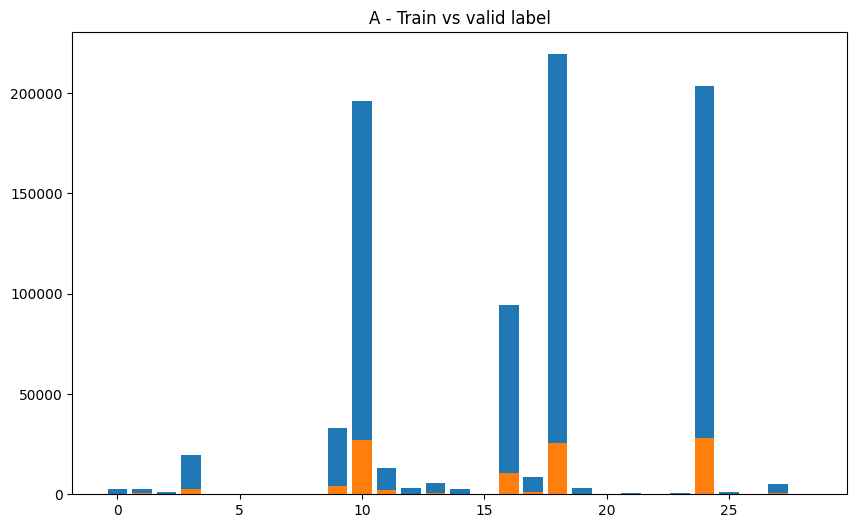

In [42]:
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(29)],train_label_count['A'])
plt.bar([i for i in range(29)],valid_label_count['A'])
plt.title('A - Train vs valid label')
plt.show()

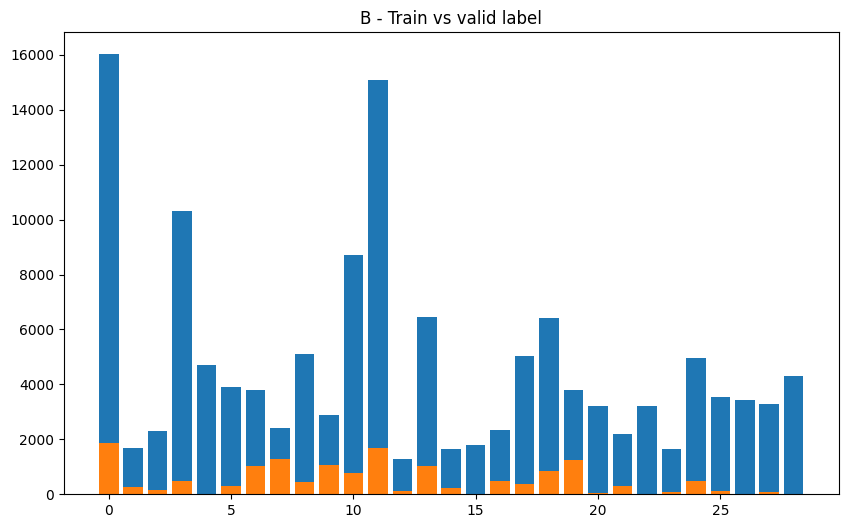

In [43]:
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(29)],train_label_count['B'])
plt.bar([i for i in range(29)],valid_label_count['B'])
plt.title('B - Train vs valid label')
plt.show()

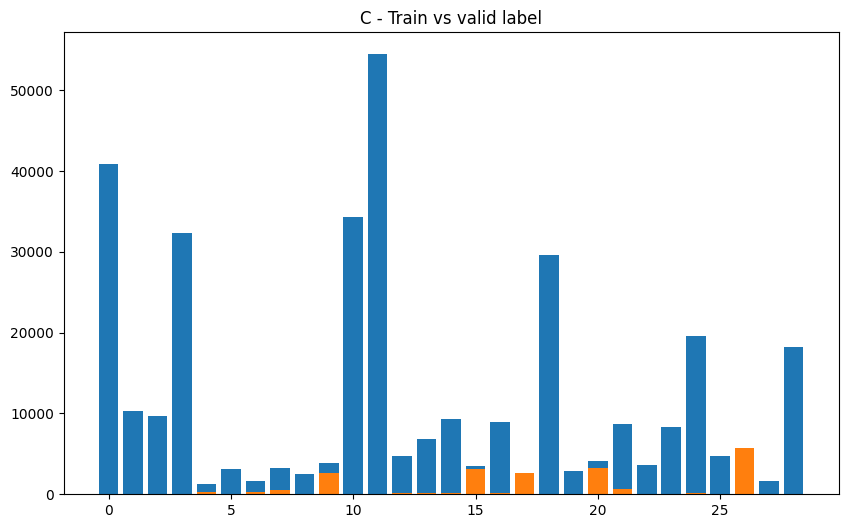

In [44]:
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(29)],train_label_count['C'])
plt.bar([i for i in range(29)],valid_label_count['C'])
plt.title('C - Train vs valid label')
plt.show()